# [Note]: Dont't forgot uploading coco.names file and utils folder to the virtual machine of colab

# Download the COCO dataset(val2014)

## Download to current path: /content/

In [ ]:
!pwd

In [ ]:
%cd /content/
!ls

In [ ]:
!wget http://images.cocodataset.org/zips/val2014.zip

--2020-10-14 03:30:22--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.12.180
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.12.180|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  16.4MB/s    in 6m 37s  

2020-10-14 03:37:00 (15.9 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



## Download the label: annotations

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

--2020-10-25 02:08:37--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.88.203
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.88.203|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  42.0MB/s    in 5.9s    

2020-10-25 02:08:44 (40.7 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]



In [ ]:
!pwd
!ls

/content/COCO_val2014
annotations_trainval2014.zip  coco.names  utils  val2014.zip


# Unzip to the current folder

In [ ]:
!unzip -q val2014.zip

In [ ]:
!unzip -q annotations_trainval2014.zip

In [ ]:
!pwd

/content/COCO_val2014


# Installing dependency libraries

In [ ]:
!pip install gluoncv
!pip install mxnet
!pip install tqdm

     |████████████████████████████████| 819kB 2.7MB/s 
     |████████████████████████████████| 55.0MB 76kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


# Loading dataset of val2014 with gluocv(image+annotation)

In [ ]:
import numpy as np
import gluoncv
import tqdm
import cv2
import matplotlib.pyplot as plt
from utils.plot_utils import get_color_table, plot_one_box

import pandas as pd

# 读取coco.names文件获得目标标签名称
def read_class_names(class_name_path):
	#字典型
    names = {}
    with open(class_name_path, 'r') as data:
        for ID, name in enumerate(data):
            names[ID] = name.strip('\n')
    return names

class_name_path = 'coco.names'
# Num of training images: 117266(2017)
#train_dataset = gluoncv.data.COCODetection(root='./', splits='instances_train2017')

# Num of validation images: 40137(2014)
val_dataset = gluoncv.data.COCODetection('./',splits='instances_val2014')

# pandas库
# Getting names of the objects present in COCO dataset.
#names= pd.read_csv("coco.names")
#print("coco.names:",names.info())

#字典型
names = read_class_names(class_name_path)
num_names = len(names)
color_table = get_color_table(num_names)

print(type(names))
print("coco.names:",names)
print(type(names.values()))
#print('Num of training images:', len(train_dataset))
print('Num of validation images:', len(val_dataset))

loading annotations into memory...
Done (t=5.29s)
creating index...
index created!
<class 'dict'>
coco.names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorbike', 4: 'aeroplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'sofa', 58: 'pottedplant', 59: 'bed', 60: 'diningtable', 61:

# Loading image with label(boundingbox and class) test

[17. 17.]
(2,)
[243.88 162.92 446.02 337.93]
[330.1  113.01 382.81 156.39]


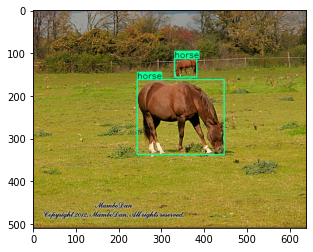

In [ ]:
#Loading random image and it's respective label
val_image, val_label = val_dataset[40136]
#Getting bounding boxes of objects present in the loaded image.
bounding_boxes = val_label[:, :4]
# Getting Classes of objects present in the image.
# 去掉冗余维度
# class_ids = np.squeeze(val_label[:, 4:5]) 
class_ids = np.squeeze(val_label[:, 4:5], axis = 1)
print(class_ids)

# <class 'numpy.ndarray'>
print(class_ids.shape)

img_ori = val_image.asnumpy()

for i in range(len(bounding_boxes)):
    print(bounding_boxes[i])
    x0, y0, x1, y1 = bounding_boxes[i]
    plot_one_box(img_ori, [x0, y0, x1, y1], label=names[class_ids[i]], color=color_table[class_ids[i]], line_thickness=2)

plt.imshow(img_ori)
plt.show()

# Statistics on the number of targets in each category

In [ ]:
from tqdm import tqdm_notebook as tqdm
import pandas as pd

# 读取coco.names文件获得目标标签名称
def read_class_names(class_name_path):
    #字典型
    names = {}
    with open(class_name_path, 'r') as data:
        for ID, name in enumerate(data):
            names[ID] = name.strip('\n')
    return names

# 读取类名文件
class_name_path = 'coco.names'
# 字典型--{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorbike', 4: 'aeroplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'sofa', 58: 'pottedplant', 59: 'bed', 60: 'diningtable', 61: 'toilet', 62: 'tvmonitor', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}
names = read_class_names(class_name_path)

Id_counts={}
for k in range(80):
    Id_counts[names[k]]=0
print(Id_counts)  

for i in tqdm(range(len(val_dataset))):
    val_image, val_label = val_dataset[i]
    bounding_boxes = val_label[:, :4]
    #class_ids = val_label[:, 4:5]
    # 此图片所有目标类别索引数组
    class_ids = np.squeeze(val_label[:, 4:5], axis = 1)
    for j in class_ids:
        Id_counts[names[j]]+=1
print(Id_counts)
# {'person': 88152, 'bicycle': 2474, 'car': 15013, 'motorbike': 3075, 'aeroplane': 1445, 'bus': 2027, 'train': 1602, 'truck': 3338, 'boat': 3599, 'traffic light': 4362, 'fire hydrant': 650, 'stop sign': 686, 'parking meter': 512, 'bench': 3500, 'bird': 3955, 'cat': 1669, 'dog': 1952, 'horse': 2194, 'sheep': 3216, 'cow': 2841, 'elephant': 1863, 'bear': 462, 'zebra': 1886, 'giraffe': 1767, 'backpack': 2890, 'umbrella': 3979, 'handbag': 4116, 'tie': 2253, 'suitcase': 2244, 'frisbee': 935, 'skis': 2187, 'snowboard': 794, 'sports ball': 2218, 'kite': 2851, 'baseball bat': 1022, 'baseball glove': 1206, 'skateboard': 1710, 'surfboard': 2232, 'tennis racket': 1623, 'bottle': 8384, 'wine glass': 2638, 'cup': 7036, 'fork': 1776, 'knife': 2559, 'spoon': 2130, 'bowl': 4920, 'banana': 2925, 'apple': 1782, 'sandwich': 1461, 'orange': 2089, 'broccoli': 2697, 'carrot': 2684, 'hot dog': 1021, 'pizza': 2105, 'donut': 2540, 'cake': 2118, 'chair': 13133, 'sofa': 1927, 'pottedplant': 3077, 'bed': 1450, 'diningtable': 5244, 'toilet': 1463, 'tvmonitor': 2057, 'laptop': 1786, 'mouse': 851, 'remote': 1864, 'keyboard': 1028, 'cell phone': 2234, 'microwave': 539, 'oven': 1175, 'toaster': 78, 'sink': 1902, 'refrigerator': 888, 'book': 8560, 'clock': 2273, 'vase': 2267, 'scissors': 444, 'teddy bear': 1542, 'hair drier': 74, 'toothbrush': 634}

{'person': 0, 'bicycle': 0, 'car': 0, 'motorbike': 0, 'aeroplane': 0, 'bus': 0, 'train': 0, 'truck': 0, 'boat': 0, 'traffic light': 0, 'fire hydrant': 0, 'stop sign': 0, 'parking meter': 0, 'bench': 0, 'bird': 0, 'cat': 0, 'dog': 0, 'horse': 0, 'sheep': 0, 'cow': 0, 'elephant': 0, 'bear': 0, 'zebra': 0, 'giraffe': 0, 'backpack': 0, 'umbrella': 0, 'handbag': 0, 'tie': 0, 'suitcase': 0, 'frisbee': 0, 'skis': 0, 'snowboard': 0, 'sports ball': 0, 'kite': 0, 'baseball bat': 0, 'baseball glove': 0, 'skateboard': 0, 'surfboard': 0, 'tennis racket': 0, 'bottle': 0, 'wine glass': 0, 'cup': 0, 'fork': 0, 'knife': 0, 'spoon': 0, 'bowl': 0, 'banana': 0, 'apple': 0, 'sandwich': 0, 'orange': 0, 'broccoli': 0, 'carrot': 0, 'hot dog': 0, 'pizza': 0, 'donut': 0, 'cake': 0, 'chair': 0, 'sofa': 0, 'pottedplant': 0, 'bed': 0, 'diningtable': 0, 'toilet': 0, 'tvmonitor': 0, 'laptop': 0, 'mouse': 0, 'remote': 0, 'keyboard': 0, 'cell phone': 0, 'microwave': 0, 'oven': 0, 'toaster': 0, 'sink': 0, 'refrigerator

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



{'person': 88152, 'bicycle': 2474, 'car': 15013, 'motorbike': 3075, 'aeroplane': 1445, 'bus': 2027, 'train': 1602, 'truck': 3338, 'boat': 3599, 'traffic light': 4362, 'fire hydrant': 650, 'stop sign': 686, 'parking meter': 512, 'bench': 3500, 'bird': 3955, 'cat': 1669, 'dog': 1952, 'horse': 2194, 'sheep': 3216, 'cow': 2841, 'elephant': 1863, 'bear': 462, 'zebra': 1886, 'giraffe': 1767, 'backpack': 2890, 'umbrella': 3979, 'handbag': 4116, 'tie': 2253, 'suitcase': 2244, 'frisbee': 935, 'skis': 2187, 'snowboard': 794, 'sports ball': 2218, 'kite': 2851, 'baseball bat': 1022, 'baseball glove': 1206, 'skateboard': 1710, 'surfboard': 2232, 'tennis racket': 1623, 'bottle': 8384, 'wine glass': 2638, 'cup': 7036, 'fork': 1776, 'knife': 2559, 'spoon': 2130, 'bowl': 4920, 'banana': 2925, 'apple': 1782, 'sandwich': 1461, 'orange': 2089, 'broccoli': 2697, 'carrot': 2684, 'hot dog': 1021, 'pizza': 2105, 'donut': 2540, 'cake': 2118, 'chair': 13133, 'sofa': 1927, 'pottedplant': 3077, 'bed': 1450, 'din

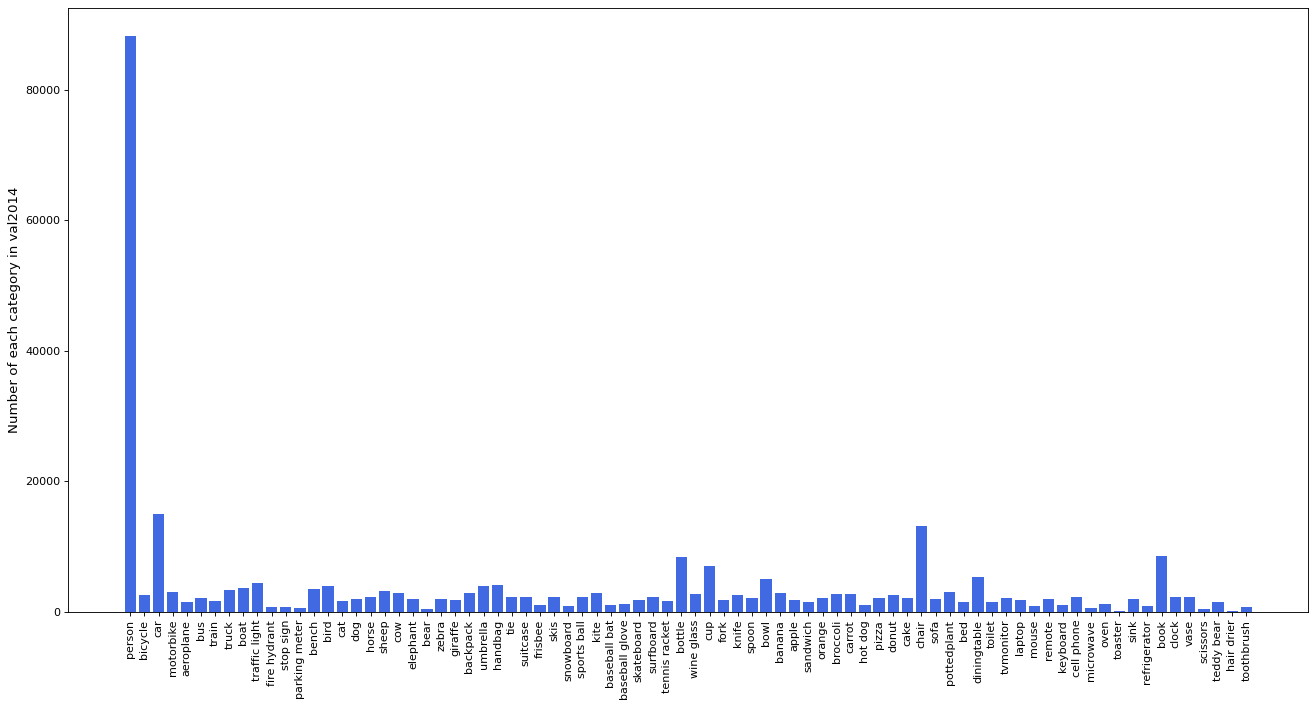

各类别目标统计数量： [88152, 2474, 15013, 3075, 1445, 2027, 1602, 3338, 3599, 4362, 650, 686, 512, 3500, 3955, 1669, 1952, 2194, 3216, 2841, 1863, 462, 1886, 1767, 2890, 3979, 4116, 2253, 2244, 935, 2187, 794, 2218, 2851, 1022, 1206, 1710, 2232, 1623, 8384, 2638, 7036, 1776, 2559, 2130, 4920, 2925, 1782, 1461, 2089, 2697, 2684, 1021, 2105, 2540, 2118, 13133, 1927, 3077, 1450, 5244, 1463, 2057, 1786, 851, 1864, 1028, 2234, 539, 1175, 78, 1902, 888, 8560, 2273, 2267, 444, 1542, 74, 634]
所有目标统计数量:  291855


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Id_counts={'person': 88152, 'bicycle': 2474, 'car': 15013, 'motorbike': 3075, 'aeroplane': 1445, 'bus': 2027, 'train': 1602, 'truck': 3338, 'boat': 3599, 'traffic light': 4362, 'fire hydrant': 650, 'stop sign': 686, 'parking meter': 512, 'bench': 3500, 'bird': 3955, 'cat': 1669, 'dog': 1952, 'horse': 2194, 'sheep': 3216, 'cow': 2841, 'elephant': 1863, 'bear': 462, 'zebra': 1886, 'giraffe': 1767, 'backpack': 2890, 'umbrella': 3979, 'handbag': 4116, 'tie': 2253, 'suitcase': 2244, 'frisbee': 935, 'skis': 2187, 'snowboard': 794, 'sports ball': 2218, 'kite': 2851, 'baseball bat': 1022, 'baseball glove': 1206, 'skateboard': 1710, 'surfboard': 2232, 'tennis racket': 1623, 'bottle': 8384, 'wine glass': 2638, 'cup': 7036, 'fork': 1776, 'knife': 2559, 'spoon': 2130, 'bowl': 4920, 'banana': 2925, 'apple': 1782, 'sandwich': 1461, 'orange': 2089, 'broccoli': 2697, 'carrot': 2684, 'hot dog': 1021, 'pizza': 2105, 'donut': 2540, 'cake': 2118, 'chair': 13133, 'sofa': 1927, 'pottedplant': 3077, 'bed': 1450, 'diningtable': 5244, 'toilet': 1463, 'tvmonitor': 2057, 'laptop': 1786, 'mouse': 851, 'remote': 1864, 'keyboard': 1028, 'cell phone': 2234, 'microwave': 539, 'oven': 1175, 'toaster': 78, 'sink': 1902, 'refrigerator': 888, 'book': 8560, 'clock': 2273, 'vase': 2267, 'scissors': 444, 'teddy bear': 1542, 'hair drier': 74, 'toothbrush': 634}

'''
	num: 窗口属性id（窗口唯一身份标识）
	figsize: 窗口大小
	dpi: 窗口分辨率
	facecolor: 窗口背景颜色
	edgecolor：窗口边框颜色
'''
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(80), Id_counts.values(), width= 0.8,color='royalblue')
plt.xticks(range(80),Id_counts.keys() , rotation=90)
plt.ylabel('Number of each category in val2014', fontsize='12')
plt.show()


#### 总的统计：因为一张图片可能有多种类别目标，所以总数比实际要多出很多（ 342989 >> 117266）
# <class 'dict_keys'>
num_count = list(Id_counts.values())
print("各类别目标统计数量：", num_count)

total = 0
for i in range(80):
	total = total + int(num_count[i])
print('所有目标统计数量: ', total)

# interested image extraction in VAL2014(6G)+VOC(xml File format conversion)



1.   [0,1,2,3,5,7]-->[person, bicycle, car, motorbike, bus, truck]
2.   If there is a 'person' object in the image, other category of objects are required before this image is selected for extraction.



In [ ]:
import cv2
import os
import shutil
import gluoncv
from tqdm import tqdm_notebook as tqdm

# 读取coco.names文件获得目标标签名称
def read_class_names(class_name_path):
    #字典型
    names = {}
    with open(class_name_path, 'r') as data:
        for ID, name in enumerate(data):
            names[ID] = name.strip('\n')
    return names

# 读取类名文件
class_name_path = 'coco.names'
# 字典型--{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorbike', 4: 'aeroplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'sofa', 58: 'pottedplant', 59: 'bed', 60: 'diningtable', 61: 'toilet', 62: 'tvmonitor', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}
names = read_class_names(class_name_path)

# Num of training images: 117266
#train_dataset = gluoncv.data.COCODetection(root='./', splits='instances_train2017')

# Num of validation images: 4952
#val_dataset = gluoncv.data.COCODetection('./',splits='instances_val2014')

#714M(5000张图片)
#Id_counts={'person': 64115, 'bicycle': 3252, 'car': 12251, 'motorbike': 3502, 'aeroplane': 2986, 'bus': 3952, 'train': 3588, 'truck': 6127, 'boat': 3025, 'traffic light': 4139, 'fire hydrant': 1711, 'stop sign': 1734, 'parking meter': 705, 'bench': 5570, 'bird': 3236, 'cat': 4114, 'dog': 4385, 'horse': 2941, 'sheep': 1529, 'cow': 1968, 'elephant': 2143, 'bear': 960, 'zebra': 1916, 'giraffe': 2546, 'backpack': 5528, 'umbrella': 3968, 'handbag': 6841, 'tie': 3809, 'suitcase': 2402, 'frisbee': 2184, 'skis': 3080, 'snowboard': 1653, 'sports ball': 4262, 'kite': 2261, 'baseball bat': 2506, 'baseball glove': 2629, 'skateboard': 3476, 'surfboard': 3486, 'tennis racket': 3394, 'bottle': 8501, 'wine glass': 2533, 'cup': 9189, 'fork': 3555, 'knife': 4326, 'spoon': 3529, 'bowl': 7111, 'banana': 2243, 'apple': 1586, 'sandwich': 2365, 'orange': 1699, 'broccoli': 1939, 'carrot': 1683, 'hot dog': 1222, 'pizza': 3166, 'donut': 1523, 'cake': 2925, 'chair': 12774, 'sofa': 4423, 'pottedplant': 4452, 'bed': 3682, 'diningtable': 11837, 'toilet': 3353, 'tvmonitor': 4561, 'laptop': 3524, 'mouse': 1876, 'remote': 3076, 'keyboard': 2115, 'cell phone': 4801, 'microwave': 1547, 'oven': 2877, 'toaster': 217, 'sink': 4678, 'refrigerator': 2360, 'book': 5332, 'clock': 4659, 'vase': 3593, 'scissors': 947, 'teddy bear': 2140, 'hair drier': 189, 'toothbrush': 1007}
Id_counts={'person': 88152, 'bicycle': 2474, 'car': 15013, 'motorbike': 3075, 'aeroplane': 1445, 'bus': 2027, 'train': 1602, 'truck': 3338, 'boat': 3599, 'traffic light': 4362, 'fire hydrant': 650, 'stop sign': 686, 'parking meter': 512, 'bench': 3500, 'bird': 3955, 'cat': 1669, 'dog': 1952, 'horse': 2194, 'sheep': 3216, 'cow': 2841, 'elephant': 1863, 'bear': 462, 'zebra': 1886, 'giraffe': 1767, 'backpack': 2890, 'umbrella': 3979, 'handbag': 4116, 'tie': 2253, 'suitcase': 2244, 'frisbee': 935, 'skis': 2187, 'snowboard': 794, 'sports ball': 2218, 'kite': 2851, 'baseball bat': 1022, 'baseball glove': 1206, 'skateboard': 1710, 'surfboard': 2232, 'tennis racket': 1623, 'bottle': 8384, 'wine glass': 2638, 'cup': 7036, 'fork': 1776, 'knife': 2559, 'spoon': 2130, 'bowl': 4920, 'banana': 2925, 'apple': 1782, 'sandwich': 1461, 'orange': 2089, 'broccoli': 2697, 'carrot': 2684, 'hot dog': 1021, 'pizza': 2105, 'donut': 2540, 'cake': 2118, 'chair': 13133, 'sofa': 1927, 'pottedplant': 3077, 'bed': 1450, 'diningtable': 5244, 'toilet': 1463, 'tvmonitor': 2057, 'laptop': 1786, 'mouse': 851, 'remote': 1864, 'keyboard': 1028, 'cell phone': 2234, 'microwave': 539, 'oven': 1175, 'toaster': 78, 'sink': 1902, 'refrigerator': 888, 'book': 8560, 'clock': 2273, 'vase': 2267, 'scissors': 444, 'teddy bear': 1542, 'hair drier': 74, 'toothbrush': 634}
# We will keep retaining_percentage% total images containing required objects.

retaining_percentage=1

# We will use Id_counts_mod to keep track count of images containing each object
Id_counts_mod={}
for k in range(80):
    Id_counts_mod[names[k]]=0

print(Id_counts_mod)

# filename:图片名
headstr = """\
<annotation>
    <folder>train_images</folder>
    <filename>%s</filename>	
    <size>
        <width>%d</width>
        <height>%d</height>
        <depth>3</depth>
    </size>
"""

objstr = """\
    <object>
        <name>%s</name>
        <bndbox>
            <xmin>%d</xmin>
            <ymin>%d</ymin>
            <xmax>%d</xmax>
            <ymax>%d</ymax>
        </bndbox>
    </object>
"""

tailstr = '''\
</annotation>
'''
# 写xml文件
def write_xml(xml_path,head, objs, tail):
    f = open(xml_path, "w")
    f.write(head)
    for obj in objs:
        f.write(objstr%(obj[0],obj[1],obj[2],obj[3],obj[4]))
    f.write(tail)

need_classID = [0,1,2,3,5,7]
k=0
imgFolder='test_images'
xmlFolder = 'test_xml'
for i in tqdm(range(len(val_dataset))):

    # 保存多个objstr
    objs = []

    val_image, val_label = val_dataset[i]
    bounding_boxes = val_label[:, :4]
    class_ids = np.squeeze(val_label[:, 4:5], axis = 1)
    #class_ids = train_label[:, 4:5]
    #print(class_ids.shape)
    include = False
    
    #You can include/exclude any objects by changing below array.
    for j in [0,1,2,3,5,7]:
        if j!=0:
            if j in class_ids:
                if (Id_counts_mod[names[j]]<Id_counts[names[j]]*(retaining_percentage/100)):
                    include=True
                    break
        else:
            if j in class_ids:
                if (Id_counts_mod[names[j]]<Id_counts[names[j]]*(retaining_percentage/100)):
                    for g in [1,2,3,5,7]:
                        if g in class_ids:
                            include=True
                            break
                    if(include):
                        break
                         
    if(include):
            imgPath = os.path.join(imgFolder, str(k)) +'.jpg'
            xmlPath = os.path.join(xmlFolder, str(k))+'.xml'
            
            # 保存图片
            image = val_image.asnumpy()
            height, width = image.shape[:2]
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            cv2.imwrite(imgPath,image)

            # 保存xml文件
            index = 0
            #print(class_ids)
            #print(class_ids.shape)

            for j in class_ids: 
                if j in [0,1,2,3,5,7]:
                  # 此类别目标数量
                  Id_counts_mod[names[j]]+=1

                  class_name = names[j]
                  xmin, ymin, xmax, ymax = bounding_boxes[index]

                  obj = [class_name, xmin, ymin, xmax, ymax]
                  objs.append(obj)
                
                index = index + 1
            filename = str(k) + '.jpg'
            head=headstr % (filename, width, height)
            tail = tailstr
            write_xml(xmlPath, head, objs, tail)

            k+=1
print(Id_counts_mod)
# 截取后结果：Id_counts_mod={'person': 24215, 'bicycle': 2474, 'car': 15013, 'motorbike': 3075, 'aeroplane': 0, 'bus': 2027, 'train': 0, 'truck': 3338, 'boat': 0, 'traffic light': 0, 'fire hydrant': 0, 'stop sign': 0, 'parking meter': 0, 'bench': 0, 'bird': 0, 'cat': 0, 'dog': 0, 'horse': 0, 'sheep': 0, 'cow': 0, 'elephant': 0, 'bear': 0, 'zebra': 0, 'giraffe': 0, 'backpack': 0, 'umbrella': 0, 'handbag': 0, 'tie': 0, 'suitcase': 0, 'frisbee': 0, 'skis': 0, 'snowboard': 0, 'sports ball': 0, 'kite': 0, 'baseball bat': 0, 'baseball glove': 0, 'skateboard': 0, 'surfboard': 0, 'tennis racket': 0, 'bottle': 0, 'wine glass': 0, 'cup': 0, 'fork': 0, 'knife': 0, 'spoon': 0, 'bowl': 0, 'banana': 0, 'apple': 0, 'sandwich': 0, 'orange': 0, 'broccoli': 0, 'carrot': 0, 'hot dog': 0, 'pizza': 0, 'donut': 0, 'cake': 0, 'chair': 0, 'sofa': 0, 'pottedplant': 0, 'bed': 0, 'diningtable': 0, 'toilet': 0, 'tvmonitor': 0, 'laptop': 0, 'mouse': 0, 'remote': 0, 'keyboard': 0, 'cell phone': 0, 'microwave': 0, 'oven': 0, 'toaster': 0, 'sink': 0, 'refrigerator': 0, 'book': 0, 'clock': 0, 'vase': 0, 'scissors': 0, 'teddy bear': 0, 'hair drier': 0, 'toothbrush': 0}

{'person': 0, 'bicycle': 0, 'car': 0, 'motorbike': 0, 'aeroplane': 0, 'bus': 0, 'train': 0, 'truck': 0, 'boat': 0, 'traffic light': 0, 'fire hydrant': 0, 'stop sign': 0, 'parking meter': 0, 'bench': 0, 'bird': 0, 'cat': 0, 'dog': 0, 'horse': 0, 'sheep': 0, 'cow': 0, 'elephant': 0, 'bear': 0, 'zebra': 0, 'giraffe': 0, 'backpack': 0, 'umbrella': 0, 'handbag': 0, 'tie': 0, 'suitcase': 0, 'frisbee': 0, 'skis': 0, 'snowboard': 0, 'sports ball': 0, 'kite': 0, 'baseball bat': 0, 'baseball glove': 0, 'skateboard': 0, 'surfboard': 0, 'tennis racket': 0, 'bottle': 0, 'wine glass': 0, 'cup': 0, 'fork': 0, 'knife': 0, 'spoon': 0, 'bowl': 0, 'banana': 0, 'apple': 0, 'sandwich': 0, 'orange': 0, 'broccoli': 0, 'carrot': 0, 'hot dog': 0, 'pizza': 0, 'donut': 0, 'cake': 0, 'chair': 0, 'sofa': 0, 'pottedplant': 0, 'bed': 0, 'diningtable': 0, 'toilet': 0, 'tvmonitor': 0, 'laptop': 0, 'mouse': 0, 'remote': 0, 'keyboard': 0, 'cell phone': 0, 'microwave': 0, 'oven': 0, 'toaster': 0, 'sink': 0, 'refrigerator

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



{'person': 882, 'bicycle': 83, 'car': 425, 'motorbike': 89, 'aeroplane': 0, 'bus': 48, 'train': 0, 'truck': 92, 'boat': 0, 'traffic light': 0, 'fire hydrant': 0, 'stop sign': 0, 'parking meter': 0, 'bench': 0, 'bird': 0, 'cat': 0, 'dog': 0, 'horse': 0, 'sheep': 0, 'cow': 0, 'elephant': 0, 'bear': 0, 'zebra': 0, 'giraffe': 0, 'backpack': 0, 'umbrella': 0, 'handbag': 0, 'tie': 0, 'suitcase': 0, 'frisbee': 0, 'skis': 0, 'snowboard': 0, 'sports ball': 0, 'kite': 0, 'baseball bat': 0, 'baseball glove': 0, 'skateboard': 0, 'surfboard': 0, 'tennis racket': 0, 'bottle': 0, 'wine glass': 0, 'cup': 0, 'fork': 0, 'knife': 0, 'spoon': 0, 'bowl': 0, 'banana': 0, 'apple': 0, 'sandwich': 0, 'orange': 0, 'broccoli': 0, 'carrot': 0, 'hot dog': 0, 'pizza': 0, 'donut': 0, 'cake': 0, 'chair': 0, 'sofa': 0, 'pottedplant': 0, 'bed': 0, 'diningtable': 0, 'toilet': 0, 'tvmonitor': 0, 'laptop': 0, 'mouse': 0, 'remote': 0, 'keyboard': 0, 'cell phone': 0, 'microwave': 0, 'oven': 0, 'toaster': 0, 'sink': 0, 'ref

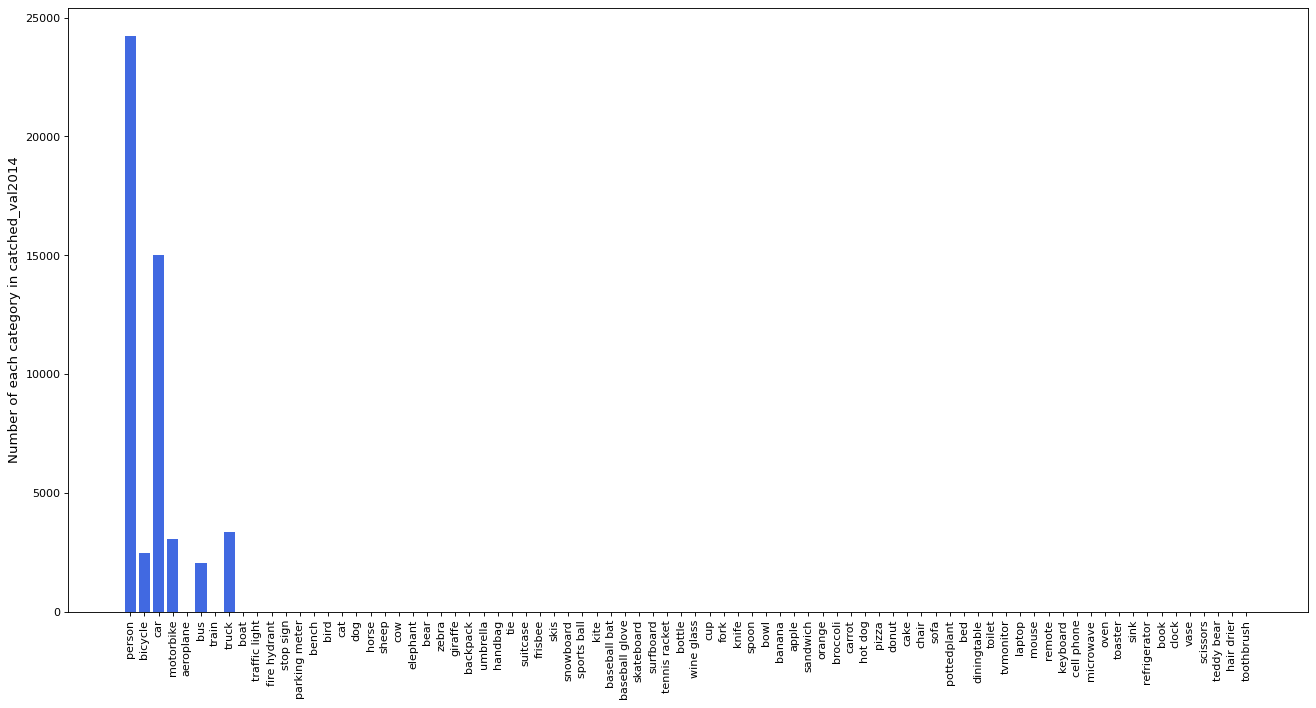

各类别目标统计数量： [24215, 2474, 15013, 3075, 0, 2027, 0, 3338, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
所有目标统计数量:  50142


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Id_catched_counts={'person': 24215, 'bicycle': 2474, 'car': 15013, 'motorbike': 3075, 'aeroplane': 0, 'bus': 2027, 'train': 0, 'truck': 3338, 'boat': 0, 'traffic light': 0, 'fire hydrant': 0, 'stop sign': 0, 'parking meter': 0, 'bench': 0, 'bird': 0, 'cat': 0, 'dog': 0, 'horse': 0, 'sheep': 0, 'cow': 0, 'elephant': 0, 'bear': 0, 'zebra': 0, 'giraffe': 0, 'backpack': 0, 'umbrella': 0, 'handbag': 0, 'tie': 0, 'suitcase': 0, 'frisbee': 0, 'skis': 0, 'snowboard': 0, 'sports ball': 0, 'kite': 0, 'baseball bat': 0, 'baseball glove': 0, 'skateboard': 0, 'surfboard': 0, 'tennis racket': 0, 'bottle': 0, 'wine glass': 0, 'cup': 0, 'fork': 0, 'knife': 0, 'spoon': 0, 'bowl': 0, 'banana': 0, 'apple': 0, 'sandwich': 0, 'orange': 0, 'broccoli': 0, 'carrot': 0, 'hot dog': 0, 'pizza': 0, 'donut': 0, 'cake': 0, 'chair': 0, 'sofa': 0, 'pottedplant': 0, 'bed': 0, 'diningtable': 0, 'toilet': 0, 'tvmonitor': 0, 'laptop': 0, 'mouse': 0, 'remote': 0, 'keyboard': 0, 'cell phone': 0, 'microwave': 0, 'oven': 0, 'toaster': 0, 'sink': 0, 'refrigerator': 0, 'book': 0, 'clock': 0, 'vase': 0, 'scissors': 0, 'teddy bear': 0, 'hair drier': 0, 'toothbrush': 0}
'''
	num: 窗口属性id（窗口唯一身份标识）
	figsize: 窗口大小
	dpi: 窗口分辨率
	facecolor: 窗口背景颜色
	edgecolor：窗口边框颜色
'''
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(range(80), Id_catched_counts.values(), width= 0.8,color='royalblue')
plt.xticks(range(80),Id_catched_counts.keys() , rotation=90)
plt.ylabel('Number of each category in catched_val2014', fontsize='12')
plt.show()


#### 总的统计：因为一张图片可能有多种类别目标，所以总数比实际要多出很多（ 342989 >> 117266）
# <class 'dict_keys'>
num_count = list(Id_catched_counts.values())
print("各类别目标统计数量：", num_count)

total = 0
for i in range(80):
	total = total + int(num_count[i])
print('所有目标统计数量: ', total)

In [ ]:
!pwd

/content/COCO_val2014


In [ ]:
!ls

annotations		      coco.names   test_xml  val2014
annotations_trainval2014.zip  test_images  utils     val2014.zip


# Compress extracted subset of images and label files(xml file)

In [ ]:
!zip -q -r test_images.zip /content/COCO_val2014/test_images

In [ ]:
!zip -q -r test_xml.zip /content/COCO_val2014/test_xml

# copy the compressed file to your own google drive

[*Spetial Note]: To copy the compressed file to your own drive for faster download (directly download is very slow)

In [ ]:
!cp test_images.zip /content/drive/My\ Drive

In [ ]:
!cp test_xml.zip /content/drive/My\ Drive